In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error  # MSE and RMSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score # r-squared

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import neighbors

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings("ignore")

# TASK-1

In [2]:
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\COURSE_9_NIIT\\c9_s7_project1\\DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",sep=";")

In [3]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [5]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               706 non-null    int64  
 1   Reason for absence               706 non-null    int64  
 2   Month of absence                 706 non-null    int64  
 3   Day of the week                  706 non-null    int64  
 4   Seasons                          706 non-null    int64  
 5   Transportation expense           706 non-null    int64  
 6   Distance from Residence to Work  706 non-null    int64  
 7   Service time                     706 non-null    int64  
 8   Age                              706 non-null    int64  
 9   Work load Average/day            706 non-null    float64
 10  Hit target                       706 non-null    int64  
 11  Disciplinary failure             706 non-null    int64  
 12  Education                  

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df.shape

(706, 21)

In [11]:
df_conti=df.select_dtypes(include="number")
print(df_conti.columns)

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


# treating outlier

In [12]:
def outlier_treatment(df_conti):
    for col in df_conti:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_fence=(Q1-(1.5*IQR))
        upper_fence=(Q3+(1.5*IQR))
        print("lower fence:",lower_fence,"in column:",col)
        print("upper fence:",upper_fence,"in column:",col) 
        df.loc[df[col]<lower_fence,col]=round(lower_fence,0) # replace extreme values with lowest in (Q1-(1.5*IQR))
        df.loc[df[col]>upper_fence,col]=round(upper_fence,0) # replace extreme values with higest in (Q3+(1.5*IQR))
    return df
df=outlier_treatment(df_conti)

lower fence: -17.0 in column: ID
upper fence: 55.0 in column: ID
lower fence: -6.5 in column: Reason for absence
upper fence: 45.5 in column: Reason for absence
lower fence: -7.125 in column: Month of absence
upper fence: 19.875 in column: Month of absence
lower fence: 0.0 in column: Day of the week
upper fence: 8.0 in column: Day of the week
lower fence: -1.0 in column: Seasons
upper fence: 7.0 in column: Seasons
lower fence: 57.5 in column: Transportation expense
upper fence: 381.5 in column: Transportation expense
lower fence: -33.5 in column: Distance from Residence to Work
upper fence: 98.5 in column: Distance from Residence to Work
lower fence: -1.5 in column: Service time
upper fence: 26.5 in column: Service time
lower fence: 17.5 in column: Age
upper fence: 53.5 in column: Age
lower fence: 169.64200000000002 in column: Work load Average/day 
upper fence: 368.962 in column: Work load Average/day 
lower fence: 85.125 in column: Hit target
upper fence: 104.125 in column: Hit targe

# replacing extreme values with lowest in (Q1-(1.5*IQR))
# replacing extreme values with higest in (Q3+(1.5*IQR))

# TASK-2
# UNDERSTANDING ABSENTEESIM PATTERNS

# absenteesim by age

In [13]:
age_absenteesim=df.groupby("Age")["Absenteeism time in hours"].mean()
age_absenteesim

Age
27    4.166667
28    4.508772
29    4.428571
30    4.585366
31    6.681818
32    3.692308
33    8.137255
34    7.827586
36    5.680000
37    4.835616
38    4.206186
39    3.750000
40    4.736842
41    7.375000
43    6.000000
46    8.000000
47    3.041667
48    4.166667
49    3.200000
50    3.972973
53    0.000000
54    8.000000
Name: Absenteeism time in hours, dtype: float64

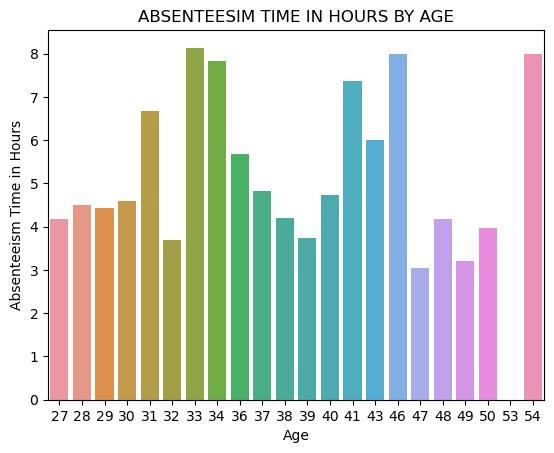

In [14]:
sns.barplot(x="Age",y="Absenteeism time in hours",data=df,errorbar = None)
plt.title("ABSENTEESIM TIME IN HOURS BY AGE")
plt.xlabel("Age")
plt.ylabel("Absenteeism Time in Hours")
plt.show()

#plot shows 58 age pepoles are more absence in hours

# ABSENTEESIM BY EDUCATION LEVEL

In [15]:
education_absenteesim=df.groupby("Education")["Absenteeism time in hours"].mean()
education_absenteesim

Education
1    5.177054
Name: Absenteeism time in hours, dtype: float64

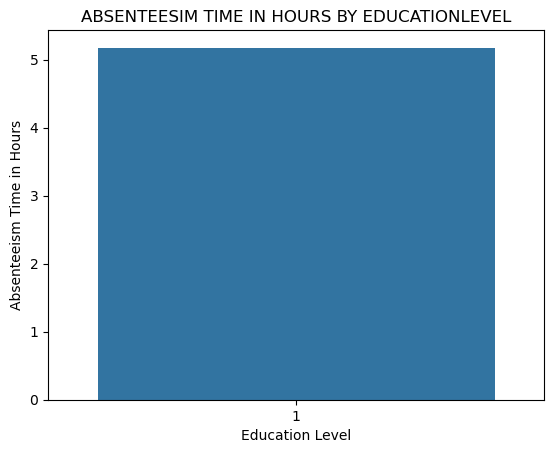

In [16]:
sns.barplot(x="Education",y="Absenteeism time in hours",data=df,errorbar = None)
plt.title("ABSENTEESIM TIME IN HOURS BY EDUCATIONLEVEL")
plt.xlabel("Education Level")
plt.ylabel("Absenteeism Time in Hours")
plt.show()

#here we can find out high school employees are more absent in hours by educational level

# Absenteesim By Childrens

In [17]:
childrens_absenteesim=df.groupby("Son")["Absenteeism time in hours"].mean()
childrens_absenteesim

Son
0    4.855019
1    4.388393
2    6.467949
3    7.533333
4    5.809524
Name: Absenteeism time in hours, dtype: float64

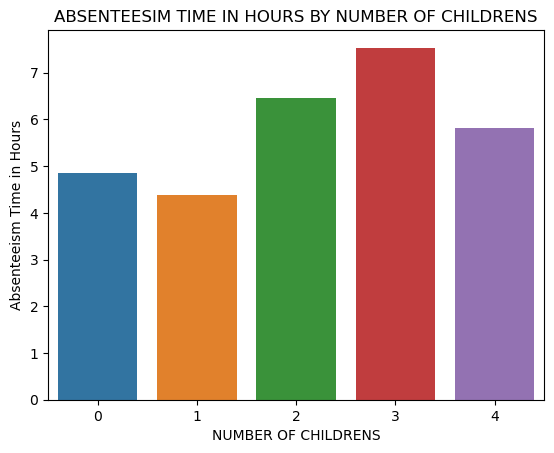

In [18]:
sns.barplot(x="Son",y="Absenteeism time in hours",data=df,errorbar = None)
plt.title("ABSENTEESIM TIME IN HOURS BY NUMBER OF CHILDRENS")
plt.xlabel("NUMBER OF CHILDRENS")
plt.ylabel("Absenteeism Time in Hours")
plt.show()

#employees are having 3 childrens are most absents 

# ABSENTEESIM BY REASON FOR ABSENCE

In [19]:
reason_absenteesim=df.groupby("Reason for absence")["Absenteeism time in hours"].mean()
reason_absenteesim

Reason for absence
0      0.000000
1      8.437500
2     17.000000
3      8.000000
4      4.500000
5      6.333333
6      8.500000
7      7.533333
8      5.333333
9     14.500000
10     8.640000
11     6.576923
12     9.750000
13     8.854545
14     6.789474
15     8.000000
16     2.000000
17     8.000000
18     7.333333
19    10.075000
21     5.833333
22     7.702703
23     2.873239
24     8.000000
25     3.483871
26     7.272727
27     2.255319
28     2.981481
Name: Absenteeism time in hours, dtype: float64

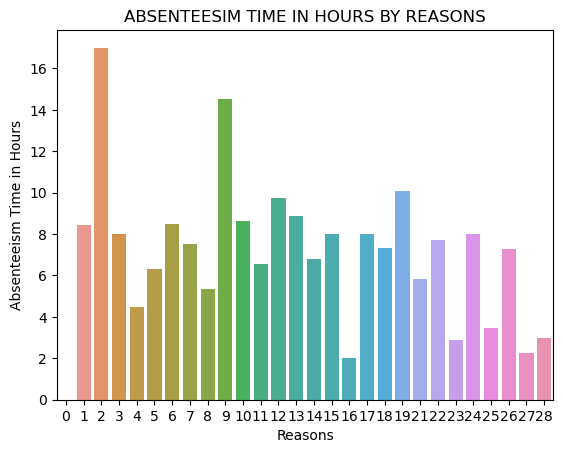

In [20]:
sns.barplot(x="Reason for absence",y="Absenteeism time in hours",data=df,errorbar = None)
plt.title("ABSENTEESIM TIME IN HOURS BY REASONS")
plt.xlabel("Reasons")
plt.ylabel("Absenteeism Time in Hours")
plt.show()

#IX(9) Diseases of the circulatory system this reason was most Absenteeism time

# ANALYAZING WORK CHARACTERSTICS(DISPLINARY FAILURE,HIT TARGET,Work load Average/day)

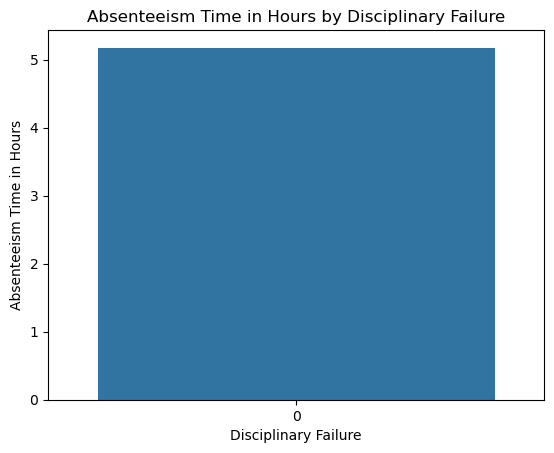

In [21]:
sns.barplot(x="Disciplinary failure",y="Absenteeism time in hours",data=df,errorbar = None)
plt.title("Absenteeism Time in Hours by Disciplinary Failure")
plt.xlabel("Disciplinary Failure")
plt.ylabel("Absenteeism Time in Hours")
plt.show()

#Here we can find 0 disciplanary actions are more absents

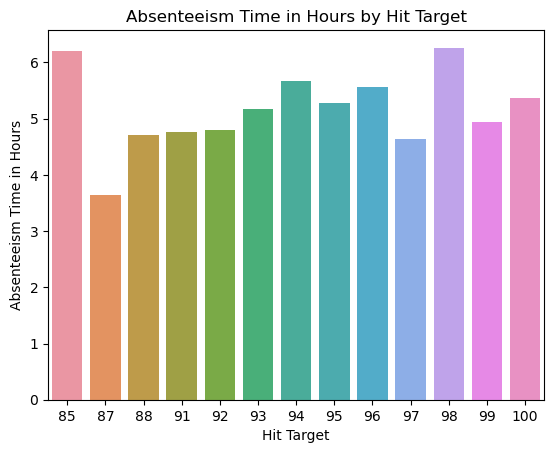

In [22]:
sns.barplot(x="Hit target",y="Absenteeism time in hours",data=df,errorbar = None)
plt.title("Absenteeism Time in Hours by Hit Target")
plt.xlabel("Hit Target")
plt.ylabel("Absenteeism Time in Hours")
plt.show()

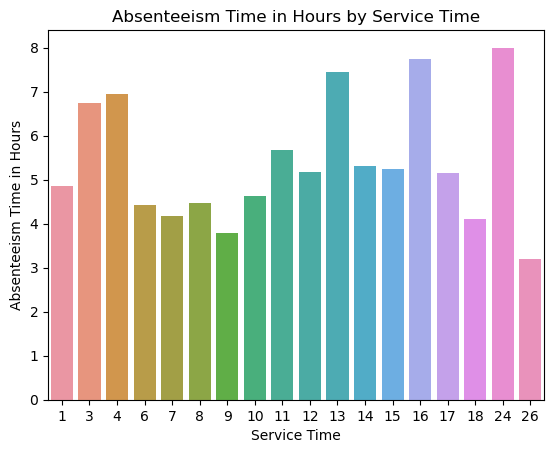

In [23]:
sns.barplot(x="Service time",y="Absenteeism time in hours",data=df,errorbar = None)
plt.title("Absenteeism Time in Hours by Service Time")
plt.xlabel("Service Time")
plt.ylabel("Absenteeism Time in Hours")
plt.show()

In [24]:
corr_analysis=df[["Age","Education","Son","Disciplinary failure","Hit target","Service time","Absenteeism time in hours"]].corr()
corr_analysis

,Age,Education,Son,Disciplinary failure,Hit target,Service time,Absenteeism time in hours
Age,1.000000,NaN,0.052616,NaN,-0.030220,0.684176,-0.035170
Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Son,0.052616,NaN,1.000000,NaN,-0.011951,-0.027316,0.123518
Disciplinary failure,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hit target,-0.030220,NaN,-0.011951,NaN,1.000000,-0.004552,0.021596
Service time,0.684176,NaN,-0.027316,NaN,-0.004552,1.000000,-0.018496
Absenteeism time in hours,-0.035170,NaN,0.123518,NaN,0.021596,-0.018496,1.000000


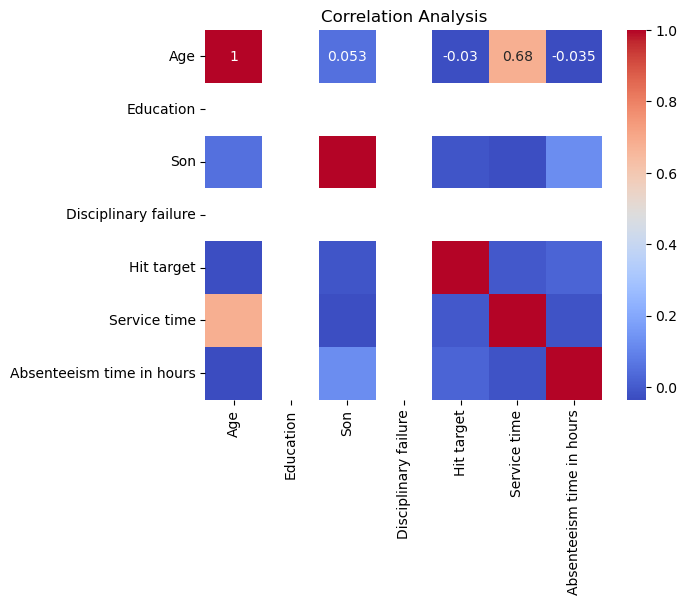

In [25]:
sns.heatmap(corr_analysis, annot=True, cmap="coolwarm")
plt.title('Correlation Analysis')
plt.show()

# TASK-3
# ANALYZING REASONS FOR ABSENTEESIM

In [26]:
reason_frequency=df["Reason for absence"].value_counts().sort_values(ascending=False)
reason_frequency

Reason for absence
23    142
28    108
13     55
27     47
0      43
19     40
22     37
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: count, dtype: int64

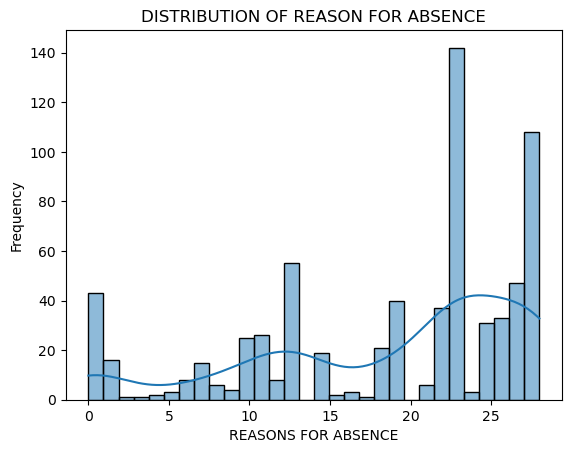

In [27]:
sns.histplot(data=df, x="Reason for absence", bins=30, kde=True)
plt.title("DISTRIBUTION OF REASON FOR ABSENCE")
plt.xlabel("REASONS FOR ABSENCE")
plt.ylabel("Frequency")
plt.show()

# 23(medical consultation) and 28(dental consultation) reasons are the most frequent reasons foe employee absence

In [28]:
# ANALYZING SEASONAL PATTERNS BY REASON FOR ABSENCE

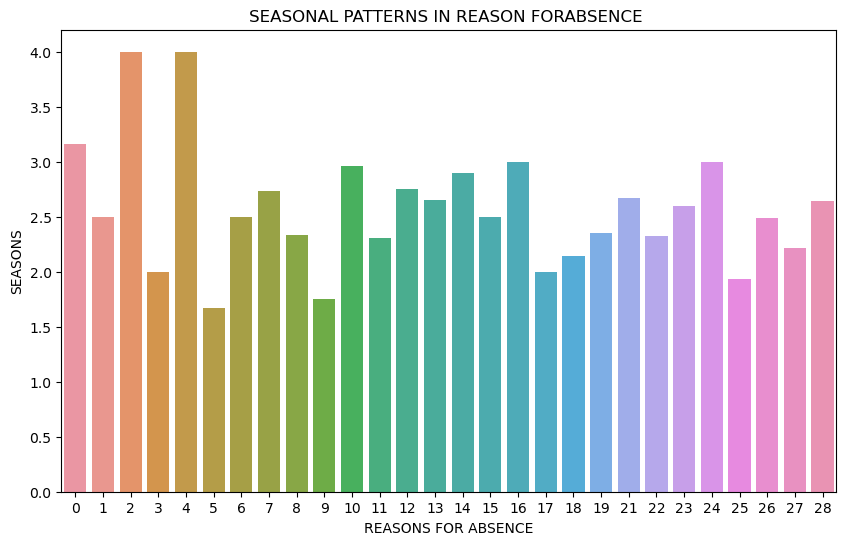

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x="Reason for absence",y="Seasons",data=df,errorbar = None)
plt.title("SEASONAL PATTERNS IN REASON FORABSENCE ")
plt.xlabel("REASONS FOR ABSENCE")
plt.ylabel("SEASONS")
plt.show()

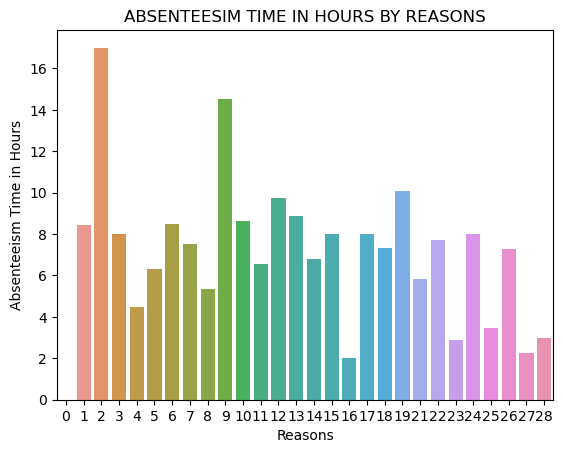

In [30]:
sns.barplot(x="Reason for absence",y="Absenteeism time in hours",data=df,errorbar = None)
plt.title("ABSENTEESIM TIME IN HOURS BY REASONS")
plt.xlabel("Reasons")
plt.ylabel("Absenteeism Time in Hours")
plt.show()

In [31]:
df_conti=df.select_dtypes(include='number')

In [32]:
df_conti.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [33]:
df_categ=df.select_dtypes(exclude='number')

In [34]:
df_categ.columns

Index([], dtype='object')

# Linear Regression

In [35]:
df_li=df[["Reason for absence","Absenteeism time in hours","Work load Average/day ","Distance from Residence to Work","Age","Service time","Son"]]

In [36]:
df_li.columns

Index(['Reason for absence', 'Absenteeism time in hours',
       'Work load Average/day ', 'Distance from Residence to Work', 'Age',
       'Service time', 'Son'],
      dtype='object')

In [37]:
df_li.head(2)

,Reason for absence,Absenteeism time in hours,Work load Average/day,Distance from Residence to Work,Age,Service time,Son
0,26,4,239.554,36,33,13,2
1,0,0,239.554,13,50,18,1


In [38]:
def Outlier_Treatment(col):
    Q1=df_li[col].quantile(0.25)
    Q3=df_li[col].quantile(0.75)
    IQR=Q3 - Q1
    LF=Q1 - (1.5 * IQR)
    UF=Q3 + (1.5 * IQR)
    df_li.loc[df_li[col] < LF, col] = round(LF , 0)
    df_li.loc[df_li[col] > UF, col] = round(UF , 0)
    return df_li

for m in df_li.columns:
    Outlier_Treatment(m)

In [39]:
Scaler = MinMaxScaler()

In [40]:
for i in df_li.columns:
    df_li[i] = Scaler.fit_transform( df_li[i].to_numpy().reshape(-1,1))

In [41]:
def cal_vif(vif_df):
    vif = pd.Series(name = "VIF")
    for i in range(0, vif_df.shape[1]):
        vif[vif_df.columns[i]] = variance_inflation_factor(vif_df.values, i)
    return vif

vif_values = cal_vif(df_li)

In [42]:
print(vif_values)

Reason for absence                  4.666484
Absenteeism time in hours           2.210308
Work load Average/day               3.366404
Distance from Residence to Work     3.994279
Age                                 6.753684
Service time                       15.113711
Son                                 1.952491
Name: VIF, dtype: float64


In [43]:
# here i am taking all columns excpet sevice time because it has high vif

In [44]:
xx=df_li.copy()

In [45]:
x=xx.drop(["Service time","Absenteeism time in hours"],axis = 1)

In [46]:
x.columns

Index(['Reason for absence', 'Work load Average/day ',
       'Distance from Residence to Work', 'Age', 'Son'],
      dtype='object')

In [47]:
y=df_li[["Absenteeism time in hours"]]

In [48]:
y.head(2)

,Absenteeism time in hours
0,0.235294
1,0.000000


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size = 0.8, random_state = 42)

In [50]:
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape) 

(564, 5)
(142, 5)
(564, 1)
(142, 1)


In [51]:
lin_reg=LinearRegression()

In [52]:
lin_reg_mod=lin_reg.fit(x_train.values,y_train.values)

In [53]:
print(lin_reg_mod.score(x_train.values,y_train.values))

0.0536241162914336


In [54]:
y_pred=lin_reg_mod.predict(x_test.values)

In [55]:
lin_reg_mod.intercept_

array([0.38113309])

In [56]:
lin_reg_mod.coef_

array([[-0.14366334,  0.03543428, -0.01900183, -0.05955166,  0.14830146]])

In [57]:
mse1=mean_squared_error(y_test,y_pred)
print("MSE1=",mse1)
mse2=mean_squared_error(y_pred,y_test) # average sum of all squared error
print("MSE2=",mse2)

MSE1= 0.07179682835315233
MSE2= 0.07179682835315233


In [58]:
mae=mean_absolute_error(y_test,y_pred) # average sum of all absolute error
print("MAE=",mae)

MAE= 0.20491767942413924


In [59]:
r_squared= r2_score(y_test,y_pred)
print("R2=",r_squared) # checks relaiabality of the model

R2= 0.04515867971352505


In [60]:
df_results=pd.DataFrame()
df_results

""


In [61]:
y_test.reset_index(inplace=True)

In [62]:
df_results["predictions"]=pd.DataFrame(y_pred)
df_results["actuals"]=y_test.iloc[:,0]
df_results["residuals"]=abs(df_results["predictions"])-abs(df_results["actuals"])
df_results

,predictions,actuals,residuals
0,0.225525,478,-477.774475
1,0.333811,81,-80.666189
2,0.358059,77,-76.641941
3,0.317269,208,-207.682731
4,0.211583,319,-318.788417
...,...,...,...
137,0.259207,257,-256.740793
138,0.227991,56,-55.772009
139,0.243814,686,-685.756186
140,0.251554,615,-614.748446


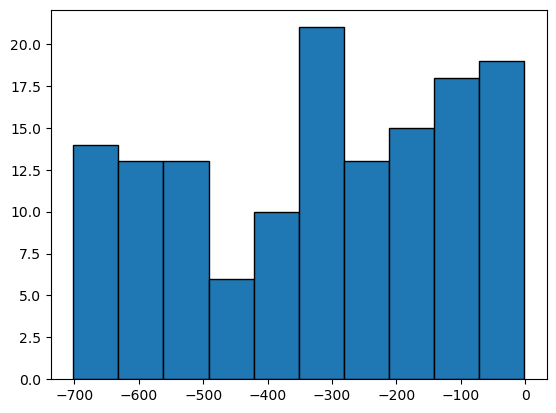

In [63]:
plt.hist(df_results["residuals"],edgecolor="black")
plt.show()

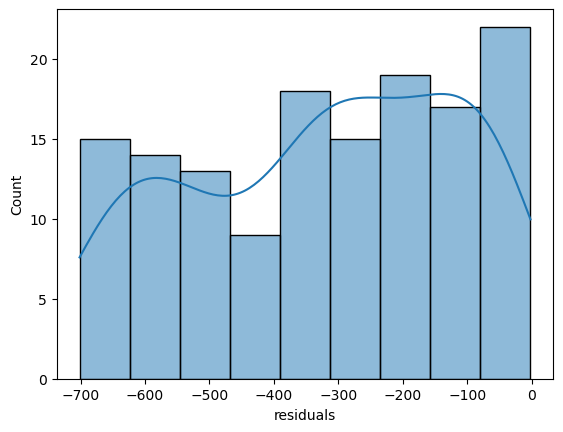

In [64]:
sns.histplot(df_results["residuals"],kde=True)
plt.show()

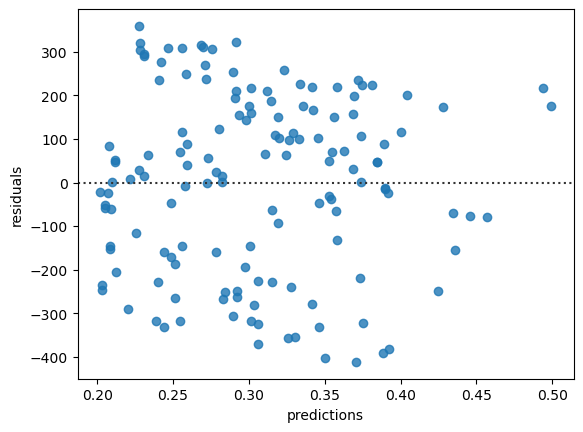

In [65]:
sns.residplot(data=df_results,x=df_results["predictions"],y=df_results["residuals"])
plt.show()

In [66]:
# conclusion:
# model is not reliable
#cannot use this model
#we need to improve the model